1. Setup and Library Imports

In [3]:
#In this section I import various python libraries in order generate and vidualise data.

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)
sns.set_style("whitegrid") # optional plot style

2. Generate the Patient Dataset

In [4]:
# Set the number of patients
num_patients = 500

# Generate age data, skewed towards a slightly older population
ages = np.concatenate([
    np.random.randint(20, 55, int(num_patients * 0.6)),  # 60% between 20-55 years
    np.random.randint(55, 75, int(num_patients * 0.3)),  # 30% between 55-75 years
    np.random.randint(75, 90, int(num_patients * 0.1))  # 10% between 75-90 years
])

#Generate simulated high blood pressure status (1=yes, 0=no) with higher probability for older patients
def generate_high_blood_pressure(age):
    if 55 <= age <=65:
      return np.random.choice([1, 0], p=[0.7, 0.3]) # higher chance for between 55 and 65
    if age > 65:
      return np.random.choice([1, 0], p=[0.6, 0.4]) # High chance for older
    return np.random.choice([1, 0], p=[0.3, 0.7])  # lower chance for others

high_blood_pressure = [generate_high_blood_pressure(age) for age in ages]

#Generate other chronic diseases, making them random for all patients
def generate_disease(disease_name):
    return np.random.choice([1, 0], size=num_patients, p=[0.2, 0.8])


#Create a simulated diseases
data = {
    'patient_id': range(1, num_patients + 1),
    'age': ages,
    'high_blood_pressure': high_blood_pressure,
    'diabetes': generate_disease('diabetes'),
    'asthma': generate_disease('asthma'),
    'heart_disease': generate_disease('heart_disease')
}
df = pd.DataFrame(data)

# Display a sample
print(df.head())

   patient_id  age  high_blood_pressure  diabetes  asthma  heart_disease
0           1   48                    0         0       1              1
1           2   34                    1         1       1              0
2           3   27                    0         0       0              0
3           4   40                    0         0       1              0
4           5   38                    0         0       0              0


In [5]:
# Filter the data to only show the 55-65 age range
target_df = df[(df['age'] >= 55) & (df['age'] <= 65)].copy()

print(target_df.head())

     patient_id  age  high_blood_pressure  diabetes  asthma  heart_disease
300         301   56                    0         0       0              0
301         302   56                    1         1       1              0
305         306   64                    1         1       1              0
306         307   60                    1         0       0              0
308         309   65                    1         0       0              0


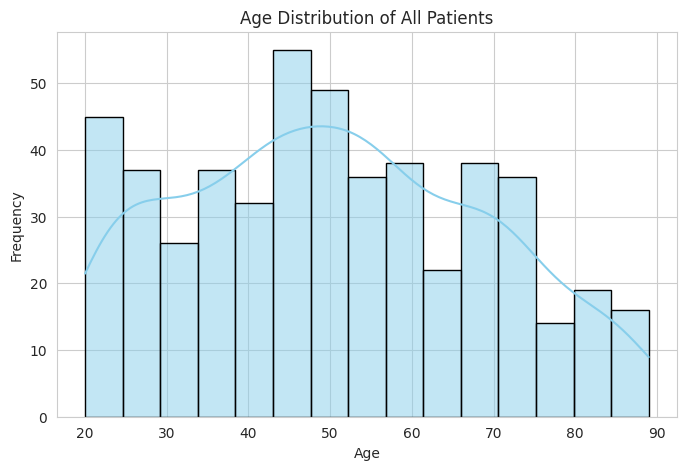

In [6]:
# Show the distribution of the entire patient age range to understand the data
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=15, kde=True, color="skyblue", edgecolor='black')
plt.title('Age Distribution of All Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

3.  Visualize the Data

<ipython-input-7-2324e7848030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bp_counts.index.map({1: 'Yes', 0: 'No'}), y=bp_counts.values, palette = ['coral','seagreen'])


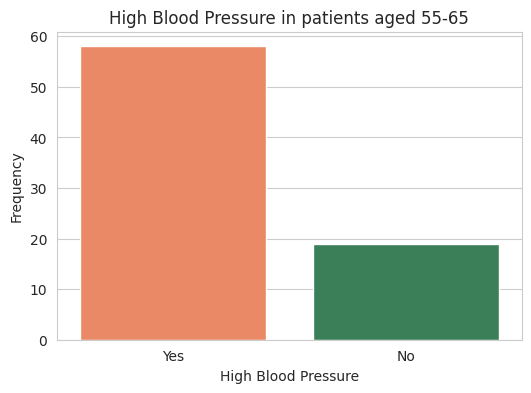

In [7]:
# count high blood pressure within the target group
bp_counts = target_df['high_blood_pressure'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=bp_counts.index.map({1: 'Yes', 0: 'No'}), y=bp_counts.values, palette = ['coral','seagreen'])
plt.title('High Blood Pressure in patients aged 55-65')
plt.xlabel('High Blood Pressure')
plt.ylabel('Frequency')
plt.show()

<ipython-input-8-a91482a96d34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='high_blood_pressure', y='age', data = df, palette = ['mediumseagreen','coral'])


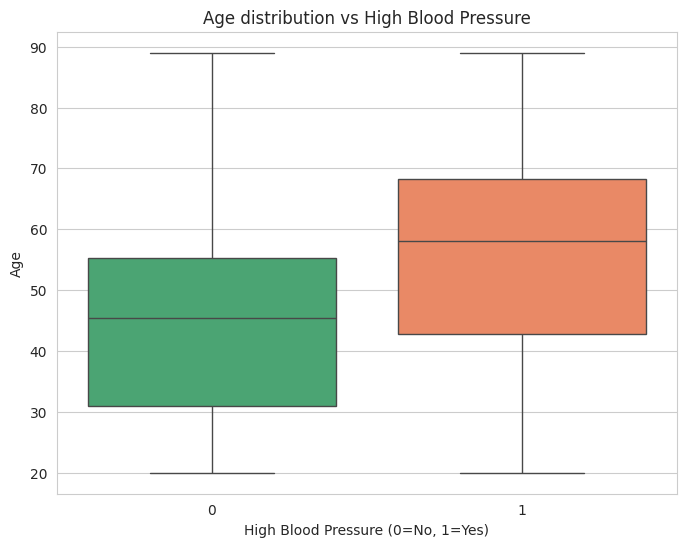

In [8]:
#See the age groups that are most at risk
plt.figure(figsize=(8,6))
sns.boxplot(x='high_blood_pressure', y='age', data = df, palette = ['mediumseagreen','coral'])
plt.title("Age distribution vs High Blood Pressure")
plt.xlabel("High Blood Pressure (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

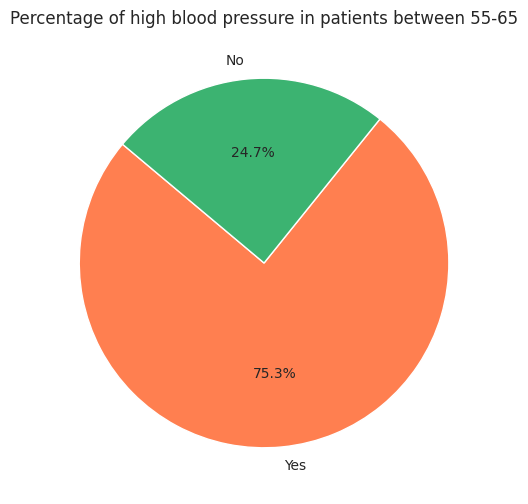

In [9]:
#show the percentage of hypertension within the target population
high_bp_count = target_df[target_df['high_blood_pressure'] == 1].shape[0]
no_bp_count = target_df[target_df['high_blood_pressure'] == 0].shape[0]
labels = ['Yes', 'No']
sizes = [high_bp_count, no_bp_count]
colors = ['coral', 'mediumseagreen']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of high blood pressure in patients between 55-65")
plt.show()